In [105]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings("ignore")

In [106]:
np.random.seed(0)
x_data = np.linspace(-2,2, num=25)
y_data = np.sin(1.5 * x_data) + np.random.normal(loc=0, scale=1, size=25)

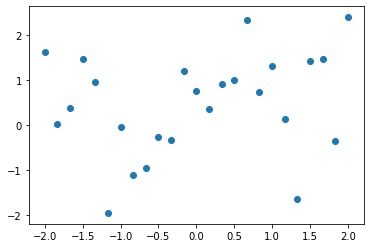

In [107]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

In [108]:
x_data = x_data[:, np.newaxis]
y_data = y_data[:, np.newaxis]

#### Model Definition starts here

In [109]:
def _sq(w):
    return np.sum(np.square(w))

In [110]:
def delta(w2):
    _w2 = _sq(w2)
    return _w1-_w2

In [111]:
def plot_graphs(x_data, y_data, y_poly_pred):
    plt.scatter(x_data, y_data, s=10)
    plt.plot(x_data, y_poly_pred, color='r')
    plt.show()

In [112]:
def print_stats(model, y_data, y_poly_pred):
    rmse = np.sqrt(mean_squared_error(y_data,y_poly_pred))
    print("RMSE               : {}".format(rmse))
    print("Model Intercept    : {}".format(model.intercept_))
    print("Model Coefficients : {}".format(model.coef_))

In [113]:
def poly_regression(Model):
    polynomial_features= PolynomialFeatures(degree=10)
    x_poly = polynomial_features.fit_transform(x_data)
    model = Model
    model.fit(x_poly, y_data)
    y_poly_pred = model.predict(x_poly)
    print_stats(model, y_data, y_poly_pred)
    plot_graphs(x_data, y_data, y_poly_pred)
    return model.coef_

#### Model definitions end here

### Linear Regression

RMSE               : 0.703158070745603
Model Intercept    : [0.413586]
Model Coefficients : [[  0.           1.93987824   3.45025549  -0.45388202 -10.58708106
   -1.28841511   8.85548614   0.66734935  -2.80423691  -0.08625301
    0.30107928]]


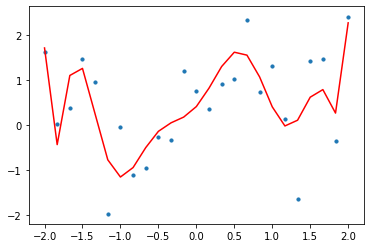

In [114]:
model = LinearRegression()
lr_weights = poly_regression(model)
_w1 = _sq(lr_weights)

### Ridge Regression

RMSE               : 0.8002129459682515
Model Intercept    : [0.60860208]
Model Coefficients : [[ 0.          1.41321558 -0.9238748  -0.31231298 -0.17669426 -0.77897274
   0.90578718  0.37924268 -0.41251048 -0.04608546  0.05410688]]


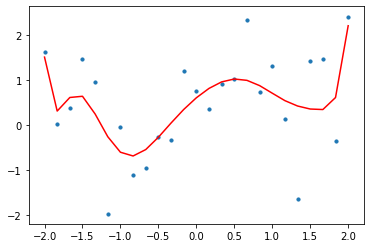

In [115]:
model = Ridge(alpha=0.5)
r_weights = poly_regression(model)

### Lasso Regression

RMSE               : 0.9311151021306889
Model Intercept    : [0.33768628]
Model Coefficients : [ 0.          0.69080677 -0.         -0.         -0.         -0.16267385
  0.          0.         -0.01178311  0.00835203  0.00436309]


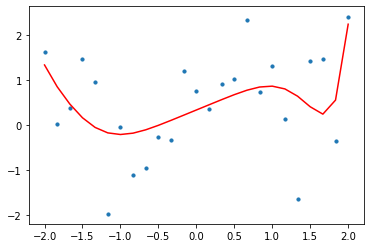

In [116]:
model = Lasso(alpha=0.05)
lasso_weights = poly_regression(model)

### ElasticNet Regression

RMSE               : 0.9416021967113037
Model Intercept    : [0.33763989]
Model Coefficients : [ 0.          0.56473939 -0.         -0.         -0.         -0.13141523
  0.         -0.         -0.01177167  0.00682822  0.00436018]


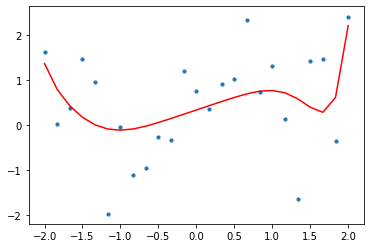

In [117]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_weights = poly_regression(model)

### Weights Comparison

In [118]:
print("w\u0372w for Linear Regression     : {}".format(_w1))
print("w\u0372w for Ridge Regression      : {}".format(_sq(r_weights[0])))
print("w\u0372w for Lasso Regression      : {}".format(_sq(lasso_weights)))
print("w\u0372w for ElasticNet Regression : {}".format(_sq(en_weights)))

wͲw for Linear Regression     : 216.44652102853362
wͲw for Ridge Regression      : 4.7257734597837375
wͲw for Lasso Regression      : 0.5039044082608664
wͲw for ElasticNet Regression : 0.33640475302960104


### W<sup>T</sup>W(Linear) - W<sup>T</sup>W(Regularized) 

In [119]:
print("Linear - Ridge      : {}".format(delta(r_weights[0])))
print("Linear - Lasso      : {}".format(delta(lasso_weights)))
print("Linear - ElasticNet : {}".format(delta(en_weights)))

Linear - Ridge      : 211.72074756874989
Linear - Lasso      : 215.94261662027276
Linear - ElasticNet : 216.11011627550403
